# PROJECT - COMP 6321 (Machine Learning)
# Somaye GHAHARI - Mehrnoosh AMJADI - Bikash
# 40106359 - 40091264 -

This is a Jupyter Notebook.

This section imports necessary libraries.

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import time
import datetime
import sklearn
import sklearn.preprocessing     # For StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.neural_network
import scipy
import scipy.stats 
%matplotlib inline
# sns.set_style('whitegrid')
np.set_printoptions(precision=3, suppress=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
sns.set(style='ticks', palette='Set2')

## Loading and Preprocessing features PHASE
Credit dataframe is loaded and process to convert to acceptable format.

In [126]:
# df_credit = pd.read_csv("archive/credits.csv", dtype='unicode')

# columns = ['cast', 'crew']

# for column in columns:
#     # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
#     df_credit[column] = df_credit[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
# df_credit["id"] = pd.to_numeric(df_credit["id"])
# df_credit.head(10)

credit datasave is in json format. 
Here some of its information like actors' and director's name and gender are seperated in different columns in df_credits_flattened dataframe.

## Don't run below cell

In [127]:
# start_time = time.time()
# df_credits_flattened = pd.DataFrame(None,None,columns=['id',
#                         'actor_1_gender','actor_2_gender','actor_3_gender',\
#                         'actor_1_name','actor_2_name','actor_3_name',\
#                         'director_gender','director_name'])
# new = {'id':np.nan,\
#               'actor_1_gender':np.nan,'actor_2_gender':np.nan,'actor_3_gender':np.nan,\
#               'actor_1_name':np.nan,'actor_2_name':np.nan,'actor_3_name':np.nan,\
#               'director_gender':np.nan,'director_name':np.nan}
# for i,row in df_credit.iterrows():
#     # dummy row
#     newrow=new
    
#     # fill id
#     #newrow['id'] = int(row['id'])

#     # fill cast
#     n1=[obj['name'] for obj in row['cast'] ]
#     n2=[obj['gender'] for obj in row['cast'] ]
#     x=min( len(n1), 3)
#     for c in range(x):
#         newrow['actor_'+str(c+1)+'_name'] = n1[c]
#         newrow['actor_'+str(c+1)+'_gender'] = int(n2[c])

#     # fill crew    
#     n1=[obj['name'] for obj in row['crew'] if obj["job"]=="Director"]
#     n2=[obj['gender'] for obj in row['crew'] if obj["job"]=="Director"]
#     if n1 and n2 :
#         newrow['director_name']=n1[0]
#         newrow['director_gender']=int(n2[0])
#     df_credits_flattened = df_credits_flattened.append(newrow,ignore_index=True)
# print("--- %s seconds ---" % (time.time() - start_time))


## Don't run below cell

In [128]:
# df_credits_flattened.replace('', np.nan, inplace=True) 
# df_credits_flattened.replace('0', np.nan, inplace=True) 
# df_credits_flattened.replace('[]', np.nan, inplace=True) 
# df_credits_flattened.replace('0.0', np.nan, inplace=True) 

## Don't run below cell

In [129]:
# df_credits_flattened["director_gender"] = pd.to_numeric(df_credits_flattened["director_gender"])
# df_credits_flattened["actor_1_gender"] = pd.to_numeric(df_credits_flattened["actor_1_gender"])
# df_credits_flattened["actor_2_gender"] = pd.to_numeric(df_credits_flattened["actor_2_gender"])
# df_credits_flattened["actor_3_gender"] = pd.to_numeric(df_credits_flattened["actor_3_gender"])
# df_credits_flattened["id"] = df_credit["id"]
# df_credits_flattened.info()

In [130]:
# df_credits_flattened.to_csv("credits_flattened.csv", index=None)

## all the above steps are computed and saved to credits_flattened.csv file

Movie metadata dataframe is loaded into df_meta.

In [2]:
df_credits_flat = pd.read_csv("credits_flattened.csv", low_memory = False)
df_credits_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               45476 non-null  int64 
 1   actor_1_gender   45476 non-null  int64 
 2   actor_2_gender   45476 non-null  int64 
 3   actor_3_gender   45476 non-null  int64 
 4   actor_1_name     45476 non-null  object
 5   actor_2_name     45476 non-null  object
 6   actor_3_name     45476 non-null  object
 7   director_gender  45476 non-null  int64 
 8   director_name    45476 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.1+ MB


In [3]:
df_meta = pd.read_csv("archive/movies_metadata.csv", low_memory=False)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

this section drops unnecessary columns and convert them to numeric values.

In [4]:
df_meta.drop(['adult', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title',\
              'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime',\
              'spoken_languages', 'status', 'tagline','video'], axis=1, inplace=True)

In [5]:
df_meta.replace('', np.nan, inplace=True) 
df_meta.replace('0', np.nan, inplace=True) 
df_meta.replace('[]', np.nan, inplace=True) 
df_meta.replace('0.0', np.nan, inplace=True) 
df_meta.replace(0.0, np.nan, inplace=True)

df_meta['budget'] = pd.to_numeric(df_meta['budget'], errors='coerce')

df_meta['id'] = pd.to_numeric(df_meta['id'], errors='coerce')

df_meta['popularity'] = pd.to_numeric(df_meta['popularity'], errors='coerce')


df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        8890 non-null   float64
 1   genres        43024 non-null  object 
 2   id            45463 non-null  float64
 3   popularity    45394 non-null  float64
 4   release_date  45379 non-null  object 
 5   revenue       7408 non-null   float64
 6   title         45460 non-null  object 
 7   vote_average  42462 non-null  float64
 8   vote_count    42561 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


Two dataframe movie credits and movie metadata are merged here.

In [6]:
# merged_df = pd.concat([df_meta, credits_flattened], axis=1)
merged_df = pd.merge(df_meta, df_credits_flat, on=['id'], how='inner')
rate = merged_df['revenue'] / merged_df['budget']
merged_df.insert(3, "profit_rate", rate, True) 
merged_df.info()
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           8912 non-null   float64
 1   genres           43096 non-null  object 
 2   id               45538 non-null  float64
 3   profit_rate      5393 non-null   float64
 4   popularity       45469 non-null  float64
 5   release_date     45451 non-null  object 
 6   revenue          7428 non-null   float64
 7   title            45535 non-null  object 
 8   vote_average     42531 non-null  float64
 9   vote_count       42630 non-null  float64
 10  actor_1_gender   45538 non-null  int64  
 11  actor_2_gender   45538 non-null  int64  
 12  actor_3_gender   45538 non-null  int64  
 13  actor_1_name     45538 non-null  object 
 14  actor_2_name     45538 non-null  object 
 15  actor_3_name     45538 non-null  object 
 16  director_gender  45538 non-null  int64  
 17  director_nam

,budget,genres,id,profit_rate,popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,4.043035,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,2,2,1,Robin Williams,Jonathan Hyde,Kirsten Dunst,2,Joe Johnston
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,NaN,11.712900,1995-12-22,NaN,Grumpier Old Men,6.5,92.0,2,2,1,Walter Matthau,Jack Lemmon,Ann-Margret,2,Howard Deutch
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,5.090760,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,1,1,1,Whitney Houston,Angela Bassett,Loretta Devine,2,Forest Whitaker
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",11862.0,NaN,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,2,1,2,Steve Martin,Diane Keaton,Martin Short,2,Charles Shyer


In the following sections, total revenue of each director is caculated and is added to dataframe as revenue_y(last column).

In [7]:
def create_comparison_database(name, value, x, no_films, df):
    
    comparison_df = df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
        
    name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    return comparison_df[comparison_df['films'] >= no_films][[ name, value]]

In [8]:
x=create_comparison_database('director_name','revenue','mean', 0, merged_df)
final_df = pd.merge(merged_df, x, on=['director_name'], how='inner', suffixes=('','_director_mean'))
final_df.head(10)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 8912 non-null   float64
 1   genres                 43096 non-null  object 
 2   id                     45538 non-null  float64
 3   profit_rate            5393 non-null   float64
 4   popularity             45469 non-null  float64
 5   release_date           45451 non-null  object 
 6   revenue                7428 non-null   float64
 7   title                  45535 non-null  object 
 8   vote_average           42531 non-null  float64
 9   vote_count             42630 non-null  float64
 10  actor_1_gender         45538 non-null  int64  
 11  actor_2_gender         45538 non-null  int64  
 12  actor_3_gender         45538 non-null  int64  
 13  actor_1_name           45538 non-null  object 
 14  actor_2_name           45538 non-null  object 
 15  ac

In this section, median of popularity of first actor is caculated and is added to dataframe as popularity_y(last column).

In [9]:
x=create_comparison_database('actor_1_name','popularity','mean', 0, final_df)
if not 'popularity_actor1_median' in final_df.columns:
    final_df = pd.merge(final_df, x, on=['actor_1_name'], how='inner', suffixes=('', '_actor1_mean'))

In [10]:
final_df

,budget,genres,id,profit_rate,popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777
1,90000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777
2,60000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777
3,75000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777
4,52000000.0,"[{'id': 18, 'name': 'Drama'}]",568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741
45534,NaN,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355
45535,NaN,"[{'id': 99, 'name': 'Documentary'}, {'id': 878...",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713
45536,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936


In [11]:
def convert_json_to_list(dataframe):
    if isinstance(dataframe, float):
        pass
    else:
        values = []
        dataframe = ast.literal_eval(dataframe)
        if isinstance(dataframe, list):
            for keys in dataframe:
                values.append(keys['name'])
            return values
        else:
            return None

In [12]:
final_df['genres'] = final_df[['genres']].applymap(convert_json_to_list)
final_df['genres_Length'] = final_df['genres'].str.len()

In [13]:
final_df['genres_score'] = final_df['genres_Length']/final_df['genres_Length'].mean()
final_df

,budget,genres,id,profit_rate,popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean,genres_Length,genres_score
0,30000000.0,"[Animation, Comedy, Family]",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358
1,90000000.0,"[Animation, Comedy, Family]",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358
2,60000000.0,"[Drama, History]",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777,2.0,0.944239
3,75000000.0,"[Comedy, Drama, History]",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777,3.0,1.416358
4,52000000.0,[Drama],568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777,1.0,0.472119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[Comedy, Horror]",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741,2.0,0.944239
45534,NaN,"[Mystery, Drama, Thriller, Horror]",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355,4.0,1.888477
45535,NaN,"[Documentary, Science Fiction]",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713,2.0,0.944239
45536,NaN,"[Comedy, Drama]",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936,2.0,0.944239


## calculating IMDB's weighted rating (wr) 

###     wr = ((v/v+m)*R) + (m/(v+m)*C)

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [14]:
## votes should be atleast 60% to qualify in the charts
m = df_meta['vote_count'].quantile(0.9)
m

178.0

In [15]:
def IMDB_weighted_rating(df, m=m):
    v = df['vote_count']
    R = df['vote_average']
    C = np.mean(df['vote_average'])
    return (v/(v+m) * R) + (m/(m+v) * C)

In [16]:
final_df["imdb_rating"] = final_df.apply(IMDB_weighted_rating,axis=1)
final_df

,budget,genres,id,profit_rate,popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean,genres_Length,genres_score,imdb_rating
0,30000000.0,"[Animation, Comedy, Family]",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358,7.7
1,90000000.0,"[Animation, Comedy, Family]",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358,7.3
2,60000000.0,"[Drama, History]",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777,2.0,0.944239,7.0
3,75000000.0,"[Comedy, Drama, History]",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777,3.0,1.416358,6.5
4,52000000.0,[Drama],568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777,1.0,0.472119,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[Comedy, Horror]",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741,2.0,0.944239,4.5
45534,NaN,"[Mystery, Drama, Thriller, Horror]",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355,4.0,1.888477,6.5
45535,NaN,"[Documentary, Science Fiction]",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713,2.0,0.944239,5.0
45536,NaN,"[Comedy, Drama]",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936,2.0,0.944239,4.0


## Preprocessing phase
#### 1. Removeing Nan Values from the entire dataset
#### 2. Normalizing all the features. 


In [17]:
# removing Nan values
final_df = final_df.dropna()
final_df = final_df.reset_index(drop=True)

# Normalizing entire features
scaler = sklearn.preprocessing.StandardScaler()
final_df["revenue"] = scaler.fit_transform(final_df["revenue"].values.reshape(-1,1))
final_df["budget"] = scaler.fit_transform(final_df["budget"].values.reshape(-1,1))
#final_df["profit_rate"] = scaler.fit_transform(final_df["profit_rate"].values.reshape(-1,1))
final_df["revenue_director_mean"] = scaler.fit_transform(final_df["revenue_director_mean"].values.reshape(-1,1))
final_df["popularity_actor1_mean"] = scaler.fit_transform(final_df["popularity_actor1_mean"].values.reshape(-1,1))
final_df["genres_score"] = scaler.fit_transform(final_df["genres_score"].values.reshape(-1,1))
final_df["imdb_rating"] = scaler.fit_transform(final_df["imdb_rating"].values.reshape(-1,1))
final_df["vote_average"] = scaler.fit_transform(final_df["vote_average"].values.reshape(-1,1))
final_df["vote_count"] = scaler.fit_transform(final_df["vote_count"].values.reshape(-1,1))
;

''

## Visualizing phase

### Director Name vs director revenue

''

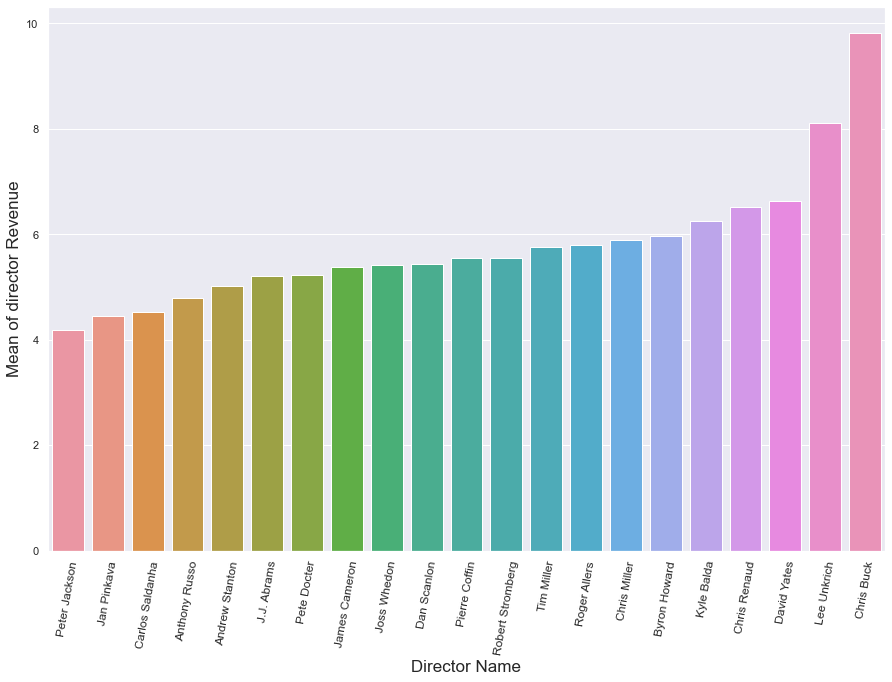

In [18]:
sns.set_style("darkgrid")
dfv = final_df[['director_name','revenue_director_mean']]
dfv =  dfv.drop_duplicates(subset=['director_name'])
dfv.sort_values(by='revenue_director_mean', inplace=True, ascending=False)
dfv.set_index('director_name')
dfv = dfv[20::-1]
#dfv
plt.figure(figsize = (15,10))
#dfv.plot(kind='barh',x='director_name', y='revenue_director_mean', color='green')
sns.barplot(x='director_name', y='revenue_director_mean', data=dfv)
plt.xticks(rotation = 80,fontsize = 12)
plt.xlabel("Director Name",fontsize = 17)
plt.ylabel("Mean of director Revenue",fontsize =17)
;

### Lead Actor vs actors popularity

''

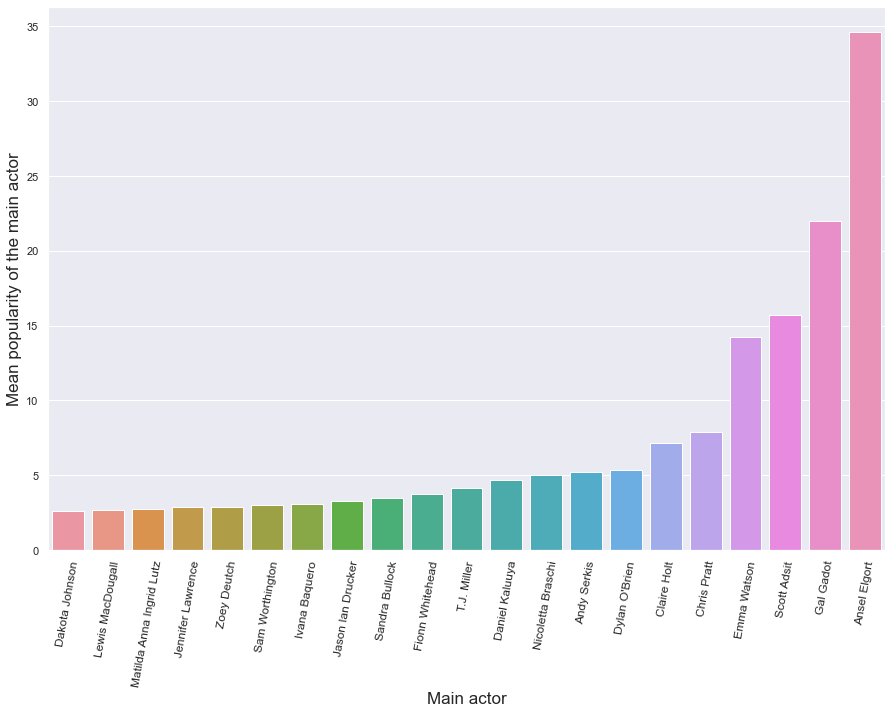

In [19]:
dfv = final_df[['actor_1_name','popularity_actor1_mean']]
dfv =  dfv.drop_duplicates(subset=['actor_1_name'])
dfv.sort_values(by='popularity_actor1_mean', inplace=True, ascending=False)
dfv.set_index('actor_1_name')
dfv = dfv[20::-1]
#dfv.plot(kind='barh',x='actor_1_name', y='popularity_actor1_mean', color='blue')
plt.figure(figsize = (15,10))
sns.barplot(x='actor_1_name', y='popularity_actor1_mean', data=dfv)
plt.xticks(rotation = 80,fontsize = 12)
plt.xlabel("Main actor",fontsize = 17)
plt.ylabel("Mean popularity of the main actor",fontsize =17)
;

C:\Users\b_jaiswa\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

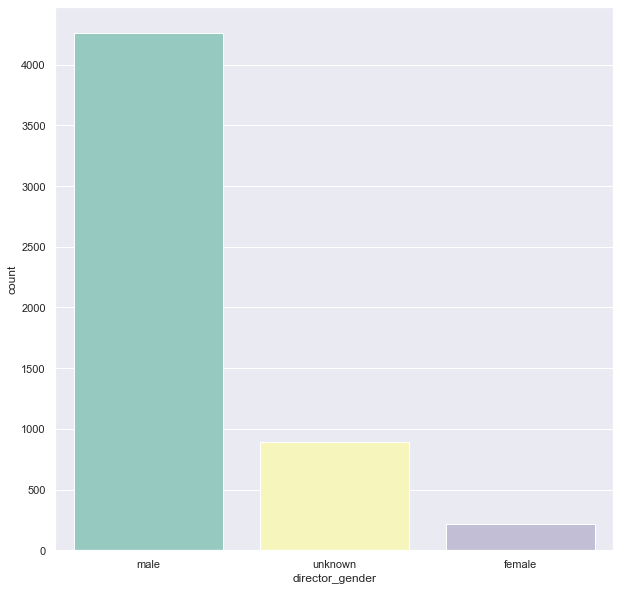

In [20]:
dfv = final_df['director_gender'].map({2:'male',1:'female',0:'unknown'})
#dfv.value_counts().plot.bar(color='orange')
plt.figure(figsize = (10,10))
sns.countplot(dfv , palette='Set3', dodge=False)
;

''

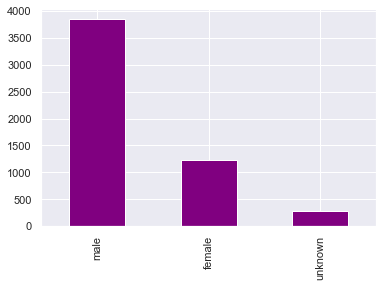

In [21]:
dfv = final_df['actor_1_gender'].map({2:'male',1:'female',0:'unknown'})
dfv.value_counts().plot.bar(color='purple')
;

### Data distribution  and visualization of Imdb-rating, genre score, Vote

1. plotting imdb-rating features

In [22]:
# plt.figsize((15,10))
dfr = final_df[['title','imdb_rating']]
# dfr =  dfr.drop_duplicates(subset=['imdb_rating'])
dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)
# dfr.set_index('title')
# dfr = dfr[20::-1]
# #dfv
# # plt.figure(figsize=(60,100))
# dfr.plot(kind='bar',xlabel = 'Title', ylabel='imdb_rating', color='green')
dfr.head(10)

<ipython-input-22-30b2238f487b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)


,title,imdb_rating
4426,Dilwale Dulhania Le Jayenge,3.133160
5328,Katyar Kaljat Ghusali,3.021992
5286,Desmundo,3.021992
3491,Stop Making Sense,2.688487
5334,The Guide,2.577319
4765,Tosun Pasha,2.577319
3303,The Godfather,2.466151
1193,The Shawshank Redemption,2.466151
3337,There Goes My Baby,2.466151
2888,Goodbye Pork Pie,2.466151


In [23]:
dfr = final_df[['title','profit_rate','imdb_rating']]
dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)
dfr.head(10)

<ipython-input-23-f49df6e575d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)


,title,profit_rate,imdb_rating
4426,Dilwale Dulhania Le Jayenge,7.575758,3.133160
5328,Katyar Kaljat Ghusali,2.933333,3.021992
5286,Desmundo,1.000000,3.021992
3491,Stop Making Sense,4.149102,2.688487
5334,The Guide,0.691289,2.577319
4765,Tosun Pasha,10.875389,2.577319
3303,The Godfather,40.844402,2.466151
1193,The Shawshank Redemption,1.133659,2.466151
3337,There Goes My Baby,0.011763,2.466151
2888,Goodbye Pork Pie,4.666667,2.466151


### Observation
#### 1. most of the highest rating movies have missing profit rate
#### 2. we might need to take the sample from 5363 sample

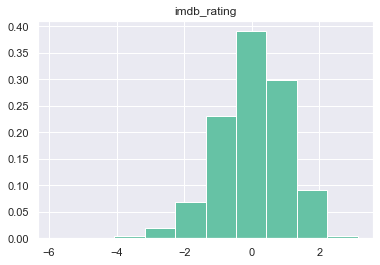

In [24]:
final_df.hist(column = 'imdb_rating',density=True);

## Observation:
#### maximim movies rating are on range of 5-7

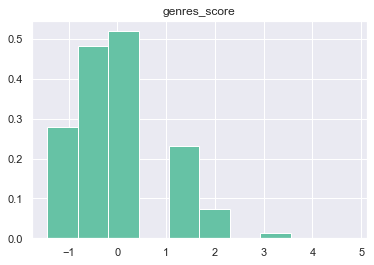

In [25]:
final_df.hist(column = 'genres_score',density=True);

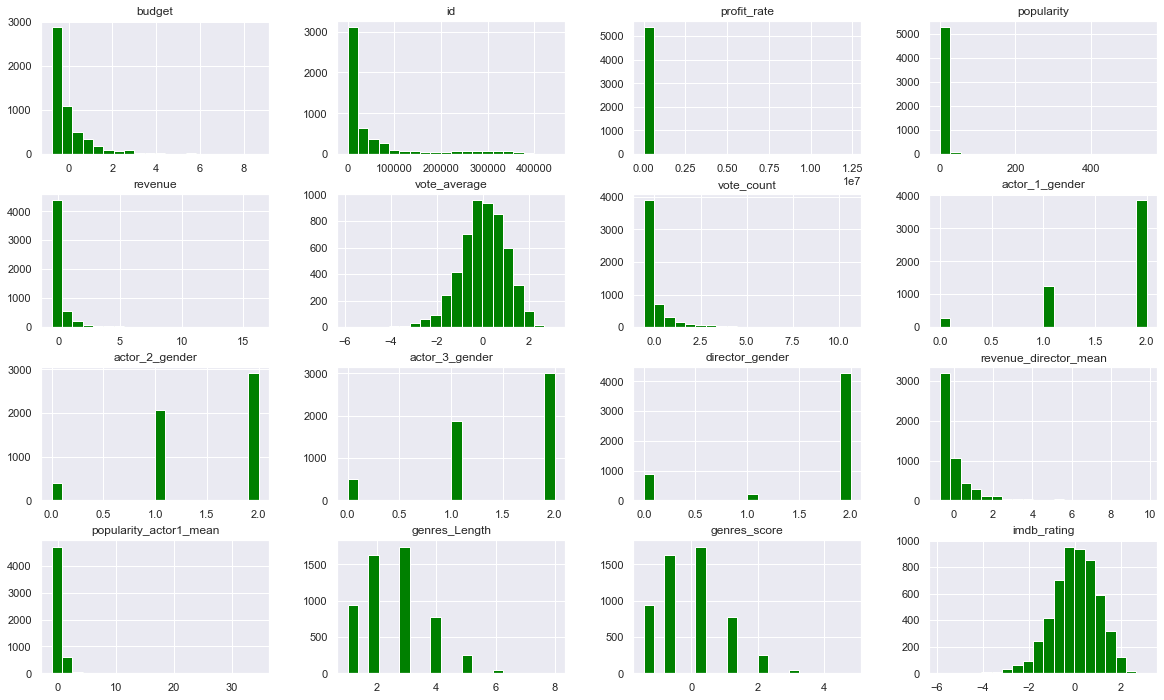

In [26]:
final_df.hist(bins=20,figsize=(20,12),color='g');

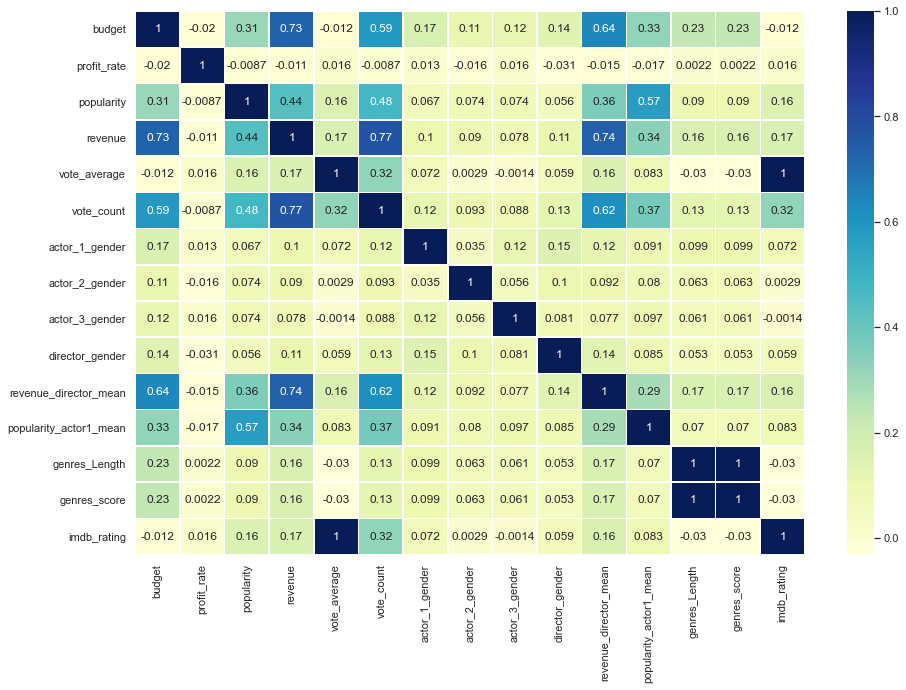

In [27]:
# df = final_df.drop(columns = ['id','budget','revenue'])

df = final_df.drop(columns = ['id'])
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5);

# Visulizing movie dataset based on release months

C:\Users\b_jaiswa\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


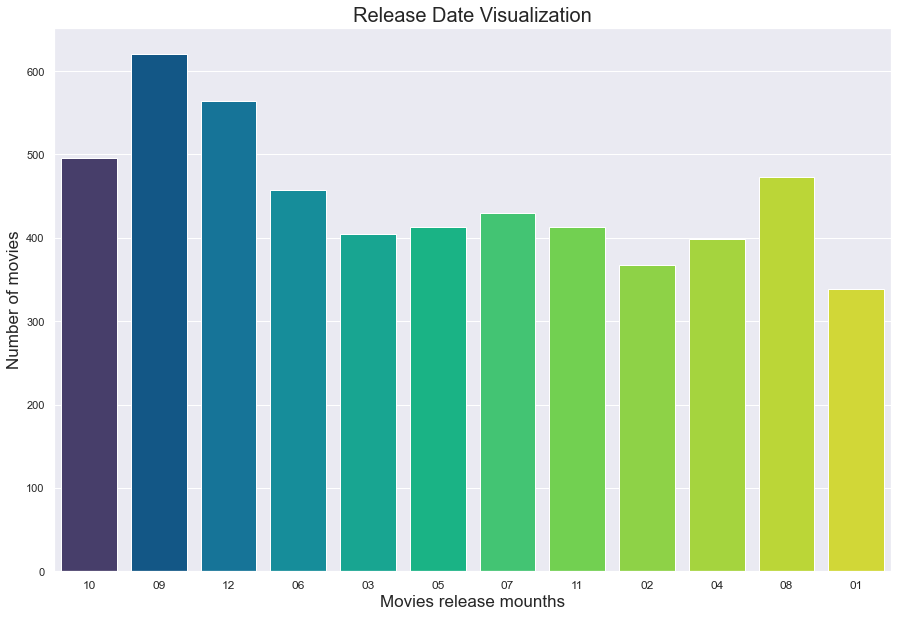

In [28]:
months = []
for i in final_df.release_date:
    dates = str(i).split('-')
    if len(dates)>1:
        months.append(dates[1])

plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
sns.countplot(months, palette=["#433771", "#005b99", "#007eae", "#009fb0", "#00bda2", "#00cd8f", "#2dda6e", "#68e53c", "#8ee930", "#aeed25", "#ccf01d", "#e9f21c"])
plt.xticks(fontsize = 12)
plt.xlabel("Movies release mounths",fontsize =17)
plt.ylabel("Number of movies",fontsize = 17)
plt.title("Release Date Visualization",fontsize = 20)
plt.show()

# Visualizing rate (Budget vs Revenue)

C:\Users\b_jaiswa\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Budget vs Revenu')

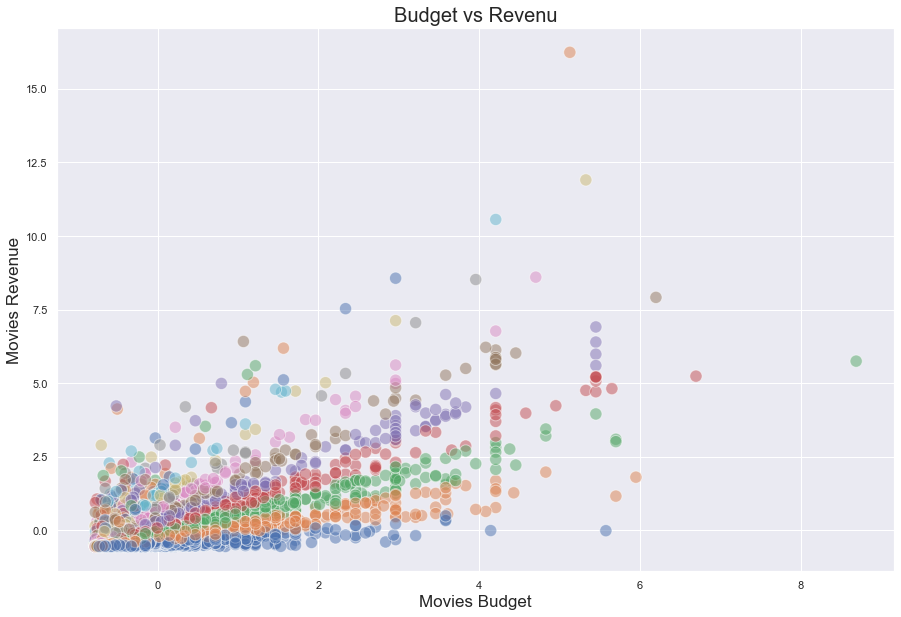

In [29]:
plt.figure(figsize = (15,10))
revenue_rs = final_df.revenue.values.reshape(-1,1)
budget_rs = final_df.budget.values.reshape(-1,1)
rate_int = final_df["profit_rate"].astype("int32")
sns.scatterplot(budget_rs[:,0], revenue_rs[:,0], size=rate_int, sizes=(150, 200), hue=rate_int, alpha=.5, palette="deep", legend=False)
plt.xlabel("Movies Budget",fontsize =17)
plt.ylabel("Movies Revenue",fontsize = 17)
plt.title("Budget vs Revenu",fontsize = 20)

# Visualizing Top 20 popular movies

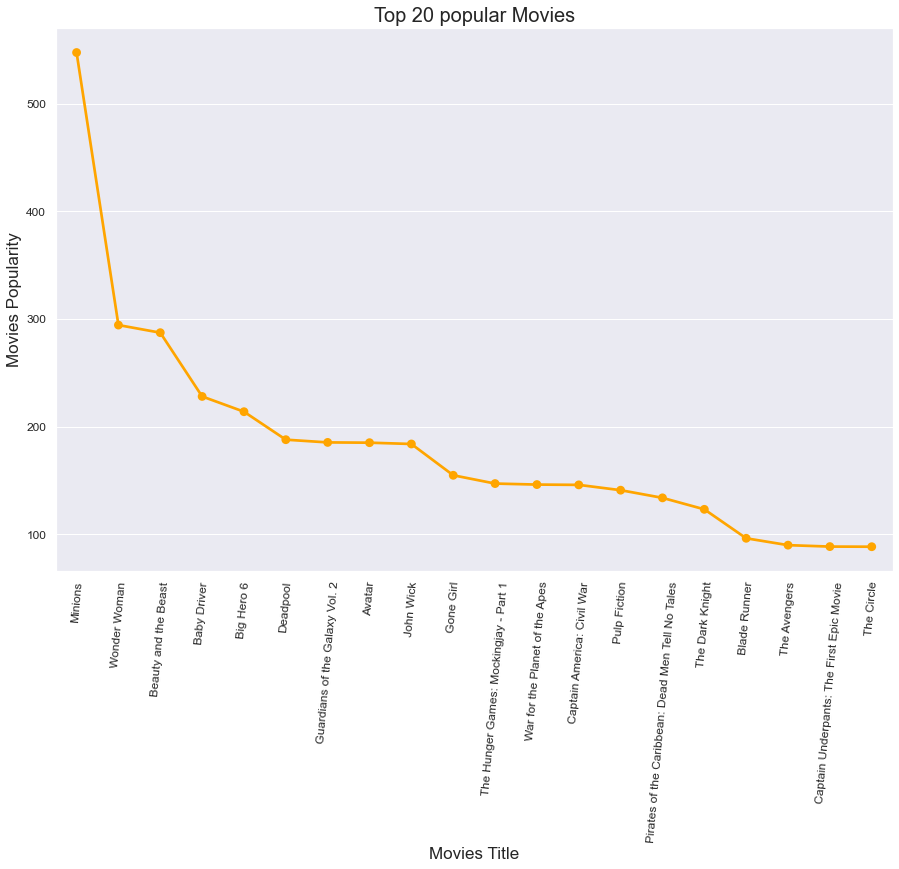

In [30]:
plt.figure(figsize = (15,10))
df_popular = final_df.nlargest(20, ['popularity']) 
sns.pointplot(x ="title",y ="popularity", data=df_popular, color = "orange")
plt.xticks(rotation = 85,fontsize = 12)
plt.yticks(fontsize=12)
plt.xlabel("Movies Title",fontsize =17)
plt.ylabel("Movies Popularity",fontsize = 17)
plt.title("Top 20 popular Movies",fontsize = 20)
plt.show()

## Label categories
#### obtaining label categories using boxplot 

lower_whisker: 5.217391304347826e-07
lower_quartile: 0.7774193548387097
median: 2.008530866666667
upper_quartile: 4.072325388235294
upper_whisker:9.008145


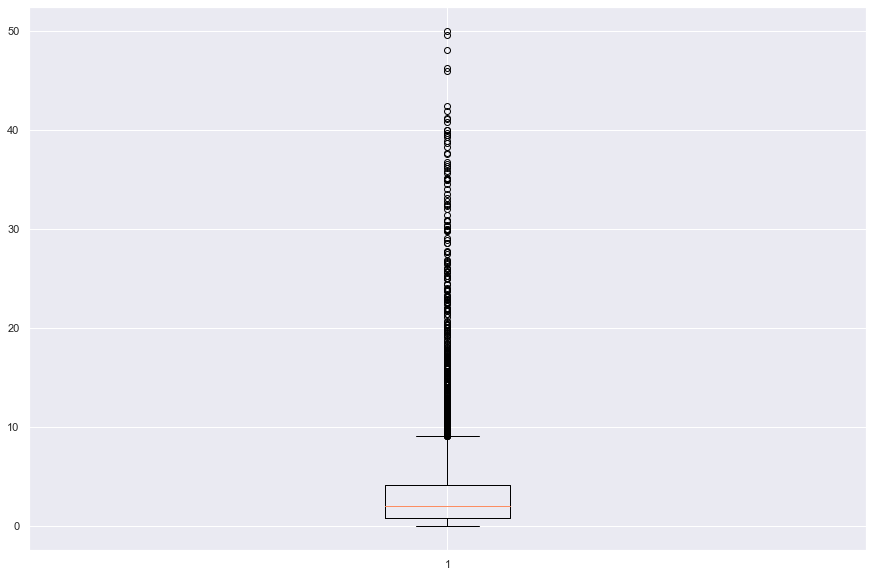

In [31]:
plt.figure(figsize = (15,10))
final_df_smp = final_df.loc[final_df['profit_rate'] <50]
bp = plt.boxplot(final_df_smp['profit_rate'])

whiskers = {}
whiskers['lower_whisker'] = bp['whiskers'][0].get_ydata()[1]
whiskers['lower_quartile'] = bp['boxes'][0].get_ydata()[1]
whiskers['median'] = bp['medians'][0].get_ydata()[1]
whiskers['upper_quartile'] = bp['boxes'][0].get_ydata()[2]
whiskers['upper_whisker'] = bp['whiskers'][1].get_ydata()[1]

print("lower_whisker: " + str(whiskers['lower_whisker']))
print("lower_quartile: " + str(whiskers['lower_quartile']))
print("median: " + str(whiskers['median']))
print("upper_quartile: " + str(whiskers['upper_quartile']))
print("upper_whisker:" + str(whiskers['upper_whisker']))

# ?

In [32]:
# final_df_without_nan['release_date']=pd.to_datetime(final_df_without_nan['release_date']).sub(pd.Timestamp('1950-01-01')).dt.days.astype(int)
y = []
for i in range(len(final_df)):
    if final_df['profit_rate'][i] >= whiskers['lower_whisker'] and final_df['profit_rate'][i] < whiskers['lower_quartile']: 
        y.append(0)
    if final_df['profit_rate'][i] >= whiskers['lower_quartile'] and final_df['profit_rate'][i] < whiskers['median']:
        y.append(1)
    if final_df['profit_rate'][i] >= whiskers['median'] and final_df['profit_rate'][i] < whiskers['upper_quartile']:
        y.append(2)
    if final_df['profit_rate'][i] >= whiskers['upper_quartile']:
        y.append(3)
        
y = np.array(y)

final_df['release_date'] = pd.to_datetime(final_df['release_date']).dt.strftime("%Y%m%d").astype(int)

final_df = final_df.drop(columns = ['id','actor_1_name','actor_2_name','actor_3_name','director_name',
                                              'title','genres','profit_rate'])
X = final_df.to_numpy()
#y = final_df_without_nan["profit_rate"].to_numpy()
print('Shape of X:',X.shape,'type of X:',X.dtype)
print('Shape of y:',y.shape,'type of y:',y.dtype)
final_df


Shape of X: (5376, 15) type of X: float64
Shape of y: (5376,) type of y: int32


,budget,popularity,release_date,revenue,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,director_gender,revenue_director_mean,popularity_actor1_mean,genres_Length,genres_score,imdb_rating
0,-0.028697,21.946943,19951030,1.703869,1.576806,3.740394,2,2,2,2,3.015673,0.672993,3.0,0.346180,1.576806
1,1.465412,17.547693,19991030,2.448969,1.132133,2.541225,2,2,1,2,3.015673,0.672993,3.0,0.346180,1.132133
2,0.718357,18.275689,20160907,0.890940,0.798628,1.096791,2,2,1,2,0.168650,0.672993,2.0,-0.545134,0.798628
3,1.091884,9.979162,20071219,0.171978,0.242787,-0.312492,2,2,1,2,-0.049071,0.672993,3.0,0.346180,0.242787
4,0.519143,18.761467,19950630,1.593644,1.132133,0.722101,2,2,2,2,0.901005,0.672993,1.0,-1.436447,1.132133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,-0.688596,1.900502,20091126,-0.521868,-0.313053,-0.575334,0,0,0,0,-0.690712,-0.904783,2.0,-0.545134,-0.313053
5372,-0.755831,0.903061,20061123,-0.536165,-0.535390,-0.580926,0,2,2,0,-0.709962,-0.998048,2.0,-0.545134,-0.535390
5373,-0.725948,0.679141,20080703,-0.542517,-1.758240,-0.581725,1,1,0,0,-0.713256,-1.016472,2.0,-0.545134,-1.758240
5374,-0.526734,1.557671,20150220,-0.498739,-0.424222,-0.580926,1,0,1,0,-0.653099,-0.878898,4.0,1.237493,-0.424222


number of y equal to 0 :  1322
number of y equal to 1 :  1322
number of y equal to 2 :  1322
number of y equal to 3 :  1410


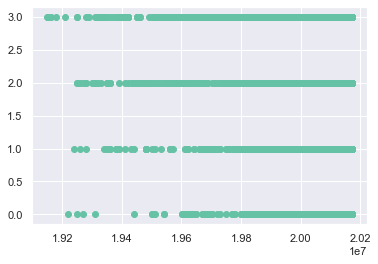

In [33]:
plt.scatter(final_df['release_date'].to_numpy(),y)
print('number of y equal to 0 : ',np.count_nonzero(y ==0 , axis=0))
print('number of y equal to 1 : ',np.count_nonzero(y ==1 , axis=0))
print('number of y equal to 2 : ',np.count_nonzero(y ==2 , axis=0))
print('number of y equal to 3 : ',np.count_nonzero(y ==3 , axis=0))


# Creating training validating and testing dataset
## Spliting Data
#### Splitting data to train, test and validation which each one comprises respectively 60%, 20%, 20% of original data.
* tarining data set: X_trn, y_trn
* validating data set: X_vld, y_vld
* testing data set: X_tst, y_ts

In [177]:
X_train, X_temp, y_train, y_temp = sklearn.model_selection.train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = sklearn.model_selection.train_test_split(X_temp, y_temp, train_size=0.5, test_size=0.5, random_state=0)

# First Train Phase (define necessary functions):

### the point of this section is to use hyperparameter search to get the best estimator
This below function help to tarin multiple estimators:

In [178]:
def train_estimators_randomized(XX, yy, estimator_type, param_name, param_vals, **kwargs):
    
    param_dic= {}
    param_dic[param_name] = param_vals
    clsObj = estimator_type()
    clsObj.set_params(**kwargs)
    rscv = sklearn.model_selection.RandomizedSearchCV(clsObj, param_dic, verbose=1, cv=3, n_iter=16, return_train_score=True).fit(XX, yy)
        
    return rscv, rscv.cv_results_

In [179]:
def plot_RandomizedSearch_scores(estimators_result, x_axis):
    
    scores_df = pd.DataFrame(estimators_result).sort_values(by='rank_test_score')
    plt.figure(figsize = (6,6))
    plt.xlabel(x_axis)
    plt.ylabel('Score')
    plt.title("Best estimator: ")
    plt.scatter(scores_df[x_axis], scores_df['mean_train_score'], s=25, color='purple', marker='x', linestyle='solid')

# Second Train Phase (define necessary functions):
### The point of this section is to define a function to set parameters of different estimators
We use the best_parameters range that we get from hyperparameter search to trains a set of estimator. 

### train_estimators:
train_estimators is a function that trains multiple instances of `estimator_type` on (X, y) by setting argument

In [180]:
def train_estimators(XX, yy, estimator_type, param_name, param_vals, **kwargs):
    """
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    
    For example:

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    clf=[]
    for p in param_vals:
        es=estimator_type(**{param_name: p})
        es.set_params(**kwargs)
        es.fit(XX,yy)
        clf.append(es)
        
    return clf

### score_estimators
score_estimators is a function that scores each estimator on (X, y), returning a list of scores.

In [181]:
def score_estimators(XX, yy, estimators):
    """Scores each estimator on (XX, yy), returning a list of scores."""
    score=[]
    for clf in estimators:
        s=clf.score(XX,yy)
        score.append(s)
    return score

### plot_estimator_scores
plot_estimator_scores plots the training, validation, and testing scores of a list of estimators

In [182]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    ytrn =  score_estimators(X_train, y_train, estimators)
    yval =  score_estimators(X_val, y_val, estimators)
    ytst =  score_estimators(X_test, y_test, estimators)
    plt.plot(np.arange(len(param_vals)), ytrn, 'o-', color='green', label = "train")

    plt.plot(np.arange(len(param_vals)), yval, 'o-', color='red', label = "validate")

    plt.plot(np.arange(len(param_vals)), ytst, 'k:', label = "test")
    plt.xticks(np.arange(len(param_vals)),param_vals)

    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.legend()
    plt.title(estimators[0].__class__.__name__+" score vs "+param_name)
#     plt.text(4,0.48,'train:'+str(round(ytrn[int(abs(len(ytrn)/2))],3)),color='g')
#     plt.text(4,0.44,'validate:'+str(round(yval[int(abs(len(yval)/2))],3)),color='r')
#     plt.text(4,0.4,'test:'+str(round(ytst[int(abs(len(ytst)/2))],3)),color='k')
    #return score stimator
    return estimators[yval.index(max(yval))]

# Third Train Phase:

## Logistic Regression

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    5.1s finished
C:\Users\b_jaiswa\Miniconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(C=0.653817586125217, penalty='l1', random_state=0,
                   solver='liblinear')

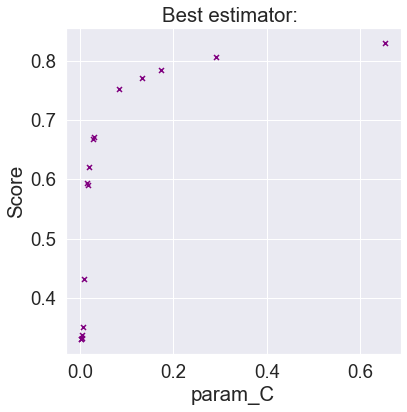

In [183]:
C = scipy.stats.reciprocal(0.001, 1)
# plt.hist(C, bins=50, label='reciprocal', alpha=0.8);


lr_r, lr_estimators_result = train_estimators_randomized(X_train, y_train, sklearn.linear_model.LogisticRegression,
                                                         'C', C,random_state=0, solver = 'liblinear', penalty = 'l1')
#     
# print(lr_estimators_result)
plot_RandomizedSearch_scores(lr_estimators_result, 'param_C')
lr_r.best_estimator_

In [184]:
lreg_estimators = train_estimators(X_train, y_train, sklearn.linear_model.LogisticRegression,
                                   'C', [0.001, 0.01, 0.1, 0.5, 1],  
                                   random_state=0,  solver = 'liblinear', penalty = 'l1')
lreg_estimators

[LogisticRegression(C=0.001, penalty='l1', random_state=0, solver='liblinear'),
 LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear'),
 LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear'),
 LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='liblinear'),
 LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear')]

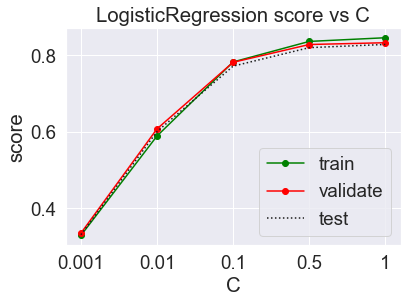

In [185]:
best_log = plot_estimator_scores(lreg_estimators, 'C', [0.001, 0.01, 0.1, 0.5, 1])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

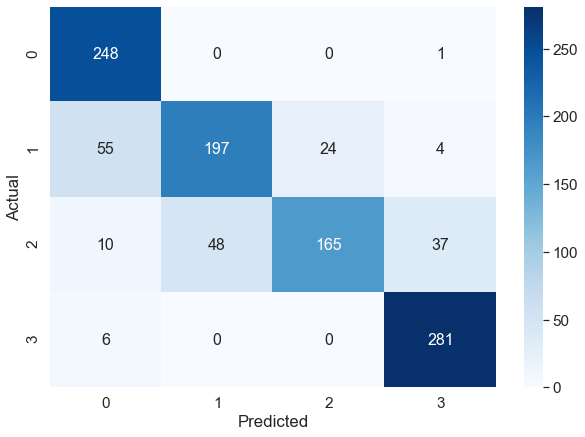

In [186]:
y_pred = lr_r.best_estimator_.predict(X_test)
data = confusion_matrix(y_test, y_pred)
df= pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')

In [187]:
X_train_norm = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_test_norm = sklearn.preprocessing.StandardScaler().fit_transform(X_test)
X_val_norm = sklearn.preprocessing.StandardScaler().fit_transform(X_val)


## Neural Network MLPerceptron

In [188]:
# batch_size = np.arange(200,800,50)
batch_size = [200,250,300,350,400,450,500]
mlp, mlp_estimators_result = train_estimators_randomized(X_train_norm, y_train, sklearn.neural_network.MLPClassifier,
                                                         'batch_size', batch_size, random_state=0, hidden_layer_sizes=(30,20),solver='adam',learning_rate_init=0.09, momentum=0.9)

mlp.best_estimator_

C:\Users\b_jaiswa\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 7 is smaller than n_iter=16. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   17.4s finished


MLPClassifier(batch_size=450, hidden_layer_sizes=(30, 20),
              learning_rate_init=0.09, random_state=0)

In [189]:
# plot_RandomizedSearch_scores(mlp_estimators_result, 'batch_size')

In [190]:
mlp_estimator = train_estimators(X_train_norm, y_train, sklearn.neural_network.MLPClassifier,
                                                         'batch_size', batch_size, random_state=0, hidden_layer_sizes=(30,20),solver='adam',learning_rate_init=0.09,momentum=0.9)

mlp_estimator

[MLPClassifier(batch_size=200, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0),
 MLPClassifier(batch_size=250, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0),
 MLPClassifier(batch_size=300, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0),
 MLPClassifier(batch_size=350, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0),
 MLPClassifier(batch_size=400, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0),
 MLPClassifier(batch_size=450, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0),
 MLPClassifier(batch_size=500, hidden_layer_sizes=(30, 20),
               learning_rate_init=0.09, random_state=0)]

In [191]:
ytrn =  score_estimators(X_train_norm, y_train, mlp_estimator)
print(ytrn,"\n")
ytest = score_estimators(X_test_norm, y_test, mlp_estimator)
print(ytest,"\n")

[0.8790697674418605, 0.8886821705426357, 0.8964341085271318, 0.897984496124031, 0.8555038759689922, 0.9091472868217054, 0.9178294573643411] 

[0.7908921933085502, 0.8197026022304833, 0.7946096654275093, 0.8066914498141264, 0.7565055762081785, 0.8141263940520446, 0.8197026022304833] 



In [192]:
# best_log = plot_estimator_scores(mlp_estimator, 'batch_size', batch_size)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

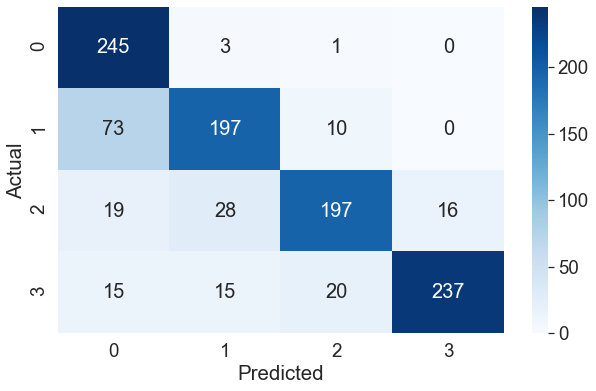

In [194]:
y_pred = mlp.best_estimator_.predict(X_test_norm)
data = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (10,6))
sns.set(font_scale=1.7)
sns.heatmap(df, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')

## SVM

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.6min finished


SVC(C=7.236071844498923, gamma=0.001, max_iter=10000, random_state=0)

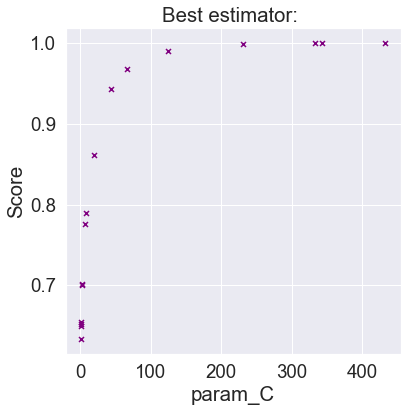

In [196]:
C = scipy.stats.reciprocal(1, 500)
rscv, estimators_result = train_estimators_randomized(X_train, y_train, sklearn.svm.SVC, 'C', C, gamma=0.001, max_iter=10000, random_state=0)
plot_RandomizedSearch_scores(estimators_result, 'param_C')
rscv.best_estimator_

In [197]:
svm_estimators = train_estimators(X_train, y_train, sklearn.svm.SVC,'C', [0.1, 10, 25, 50, 75, 100, 250], 
                                  gamma=0.001, max_iter=1000, random_state=0)
svm_estimators

C:\Users\b_jaiswa\Miniconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\b_jaiswa\Miniconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\b_jaiswa\Miniconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\b_jaiswa\Miniconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

[SVC(C=0.1, gamma=0.001, max_iter=1000, random_state=0),
 SVC(C=10, gamma=0.001, max_iter=1000, random_state=0),
 SVC(C=25, gamma=0.001, max_iter=1000, random_state=0),
 SVC(C=50, gamma=0.001, max_iter=1000, random_state=0),
 SVC(C=75, gamma=0.001, max_iter=1000, random_state=0),
 SVC(C=100, gamma=0.001, max_iter=1000, random_state=0),
 SVC(C=250, gamma=0.001, max_iter=1000, random_state=0)]

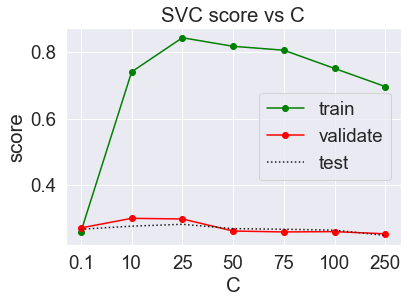

In [198]:
best_svm = plot_estimator_scores(svm_estimators, 'C', [0.1, 10, 25, 50, 75, 100, 250])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

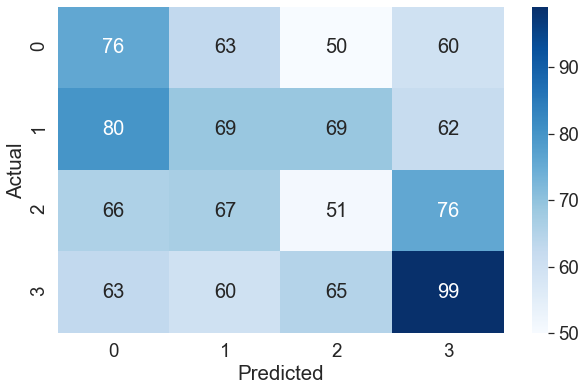

In [199]:
y_pred = rscv.best_estimator_.predict(X_test)
data = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (10,6))
sns.set(font_scale=1.7)
sns.heatmap(df, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')

## Random Forest

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   36.1s finished


RandomForestClassifier(max_depth=20.661503877046986, random_state=0)

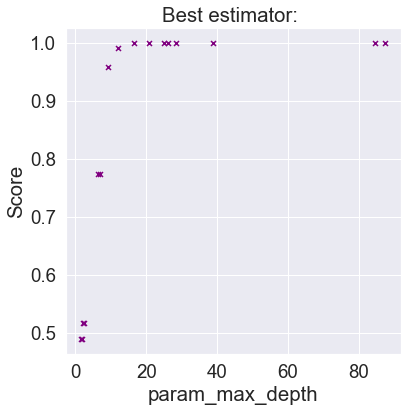

In [200]:
max_depth = scipy.stats.reciprocal(1, 100)
rf_r, rf_estimators_result = train_estimators_randomized(X_train, y_train, sklearn.ensemble.RandomForestClassifier, 'max_depth', max_depth, random_state=0)
plot_RandomizedSearch_scores(rf_estimators_result, 'param_max_depth')
rf_r.best_estimator_

In [201]:
rf_estimators = train_estimators(X_train, y_train, sklearn.ensemble.RandomForestClassifier, 
                                 'max_depth', [1, 5, 10, 20 ,50 ,100], random_state=0)
rf_estimators

[RandomForestClassifier(max_depth=1, random_state=0),
 RandomForestClassifier(max_depth=5, random_state=0),
 RandomForestClassifier(max_depth=10, random_state=0),
 RandomForestClassifier(max_depth=20, random_state=0),
 RandomForestClassifier(max_depth=50, random_state=0),
 RandomForestClassifier(max_depth=100, random_state=0)]

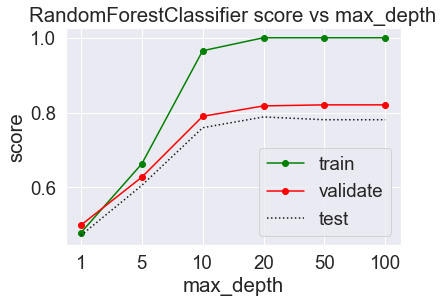

In [202]:
best_randomforest = plot_estimator_scores(rf_estimators, 'max_depth', [1, 5, 10, 20 ,50 ,100])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

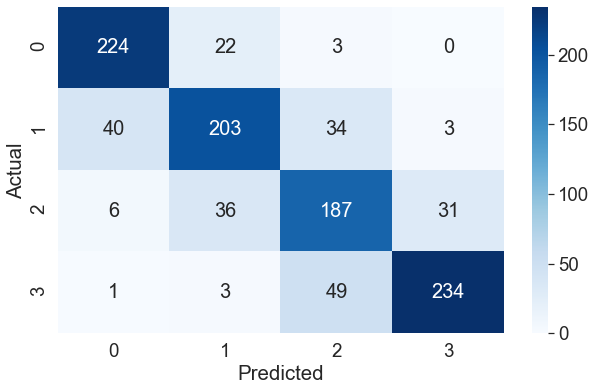

In [203]:
y_pred =rf_r.best_estimator_.predict(X_test)
data = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (10,6))
sns.set(font_scale=1.7)
sns.heatmap(df, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')

## Decision Tree

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


DecisionTreeClassifier(max_depth=78.09070215414447, random_state=0,
                       splitter='random')

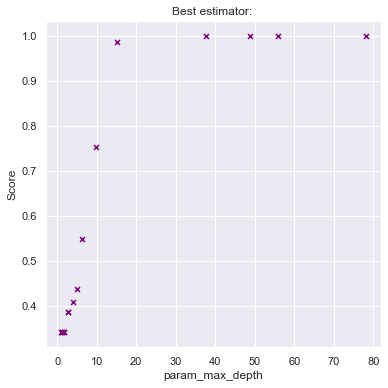

In [178]:
max_depth = scipy.stats.reciprocal(1, 100)
tr_r, tr_estimators_result = train_estimators_randomized(X_train, y_train, sklearn.tree.DecisionTreeClassifier,
                                                            'max_depth', max_depth,  splitter='random',random_state=0)
plot_RandomizedSearch_scores(tr_estimators_result, 'param_max_depth')
tr_r.best_estimator_

In [179]:
tree_estimators = train_estimators(X_train, y_train, sklearn.tree.DecisionTreeClassifier,
                                   'max_depth', [1, 5, 10,20,50], splitter='random', random_state=0)
tree_estimators

[DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random'),
 DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')]

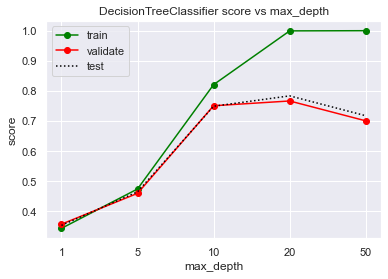

In [180]:
best_tree = plot_estimator_scores(tree_estimators, 'max_depth', [1, 5, 10,20,50])

## AdaBooster

Executing this cell take around 5min , so we commented this part.
The result is like the following image:
<img src="adabooster.png">

In [181]:
# n_est = np.random.randint(4, 4096+1, 32)
# #n_est = scipy.stats.reciprocal(4, 4096)
# ad_r, ad_estimators_result = train_estimators_randomized(X_train, y_train, sklearn.ensemble.AdaBoostClassifier,
#                                                             'n_estimators', n_est, algorithm='SAMME', random_state=0)
# plot_RandomizedSearch_scores(ad_estimators_result, 'param_n_estimators')
# ad_r.best_estimator_

In [182]:

ada_estimators = train_estimators(X_train, y_train, sklearn.ensemble.AdaBoostClassifier,
                                   'n_estimators', [4, 128, 256, 512, 1024, 4096], algorithm='SAMME', random_state=0)
ada_estimators

[AdaBoostClassifier(algorithm='SAMME', n_estimators=4, random_state=0),
 AdaBoostClassifier(algorithm='SAMME', n_estimators=128, random_state=0),
 AdaBoostClassifier(algorithm='SAMME', n_estimators=256, random_state=0),
 AdaBoostClassifier(algorithm='SAMME', n_estimators=512, random_state=0),
 AdaBoostClassifier(algorithm='SAMME', n_estimators=1024, random_state=0),
 AdaBoostClassifier(algorithm='SAMME', n_estimators=4096, random_state=0)]

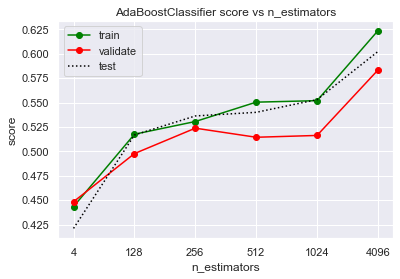

In [183]:
best_ada = plot_estimator_scores(ada_estimators, 'n_estimators', [4, 128, 256, 512, 1024, 4096])